# Project objective

This project aims to advice realtors how different feature on houses might increase estimated value of the homes they intend to sell.
This dataset contains house sale prices for King County Area.

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.pipeline import Pipeline

import statsmodels.api as sm
from statsmodels.formula.api import ols

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import plotly.express as px
import pandas as pd



from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

# 1. Importing the data 

In [2]:
# Load the data
df = pd.read_csv("kc_house_data.csv")

# 2. Analysing the data

In [3]:
# Displaying the first 5 columns of the dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Finding out the data types of the columns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# Find out the shape of the data 
df.shape

(21597, 21)

In [6]:
# Getting the summary statistics of all the columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Check for duplication
sum(df.duplicated())

0

In [8]:
# Finding out which columns have missing values
df.columns[df.isnull().any()]

Index(['waterfront', 'view', 'yr_renovated'], dtype='object')

From the above, there are houses without a waterfront, a view and some have never been renovated. We can ask a question; 

Q: What are the sale prices with houses without the following features.

In [9]:
# Find out the number of missing values
print("number of NaN values for the waterfront :", df['waterfront'].isnull().sum())
print("number of NaN values for the view :", df['view'].isnull().sum())
print("number of NaN values for the yr_renovated :", df['yr_renovated'].isnull().sum())

number of NaN values for the waterfront : 2376
number of NaN values for the view : 63
number of NaN values for the yr_renovated : 3842


0 will represent "lack of"

In [10]:
# Replace null values with zero
df['waterfront'].fillna(0)
df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].replace({0:np.nan})

In [11]:
# Drop the column ID
df.drop("id", axis = 1, inplace = True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,744.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,1995.928763,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,15.599946,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,1934.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,1987.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,2000.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,2007.250000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
df.shape

(21597, 20)

We will now try to answer the question Q above (Q: What are the sale prices with houses without the following features.)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

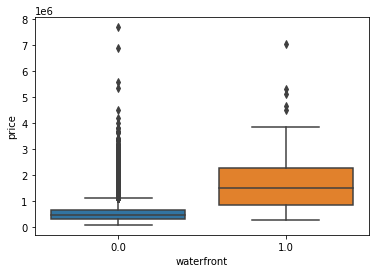

In [13]:
sns.boxplot(x='waterfront', y="price", data=df)

The price of houses with a view at a waterfront are higher than those without

<AxesSubplot:xlabel='view', ylabel='price'>

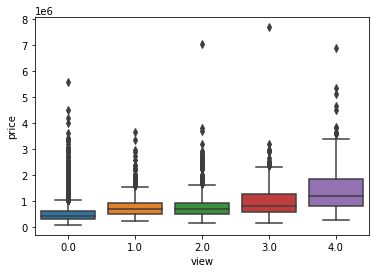

In [14]:
sns.boxplot(x='view', y="price", data=df)

Houses that have been viewed multiple time have averagely higher prices compared to the ones not viewed at all

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

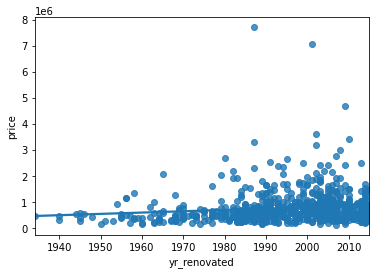

In [15]:
sns.regplot(x="yr_renovated", y="price", data=df, ci = None)

More houses have been renovated in the recent years, there is no clear linear relationship between price and year of renovation

In [16]:
# Finding out the correlation of the independent variables to the dependent variable
df.corr()['price'].sort_values()

zipcode         -0.053402
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.125499
floors           0.256804
waterfront       0.276295
lat              0.306692
bedrooms         0.308787
view             0.395734
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

The footage of the home (sqft_living) is the most correlated to price. This shows that the bigger houses are valued higher.

# Plot Price values with the variable most correlated to it (|0.5| and above)

##  Plotting a map to show prices of houses with different sizes

<AxesSubplot:title={'center':'house prices by sqft_living'}, xlabel='sqft_living', ylabel='price'>

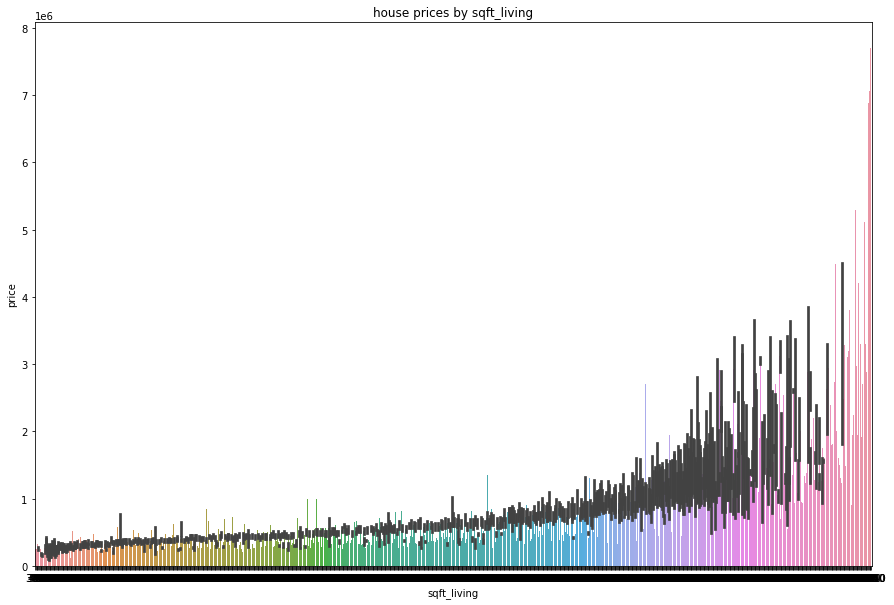

In [17]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_living")
plt.xlabel('sqft_living')
plt.ylabel('house prices')
sns.barplot(x='sqft_living',y='price',data=df)

## Plotting a map to show prices of houses with different sizes above the ground 

<AxesSubplot:title={'center':'house prices by sqft_above'}, xlabel='sqft_above', ylabel='price'>

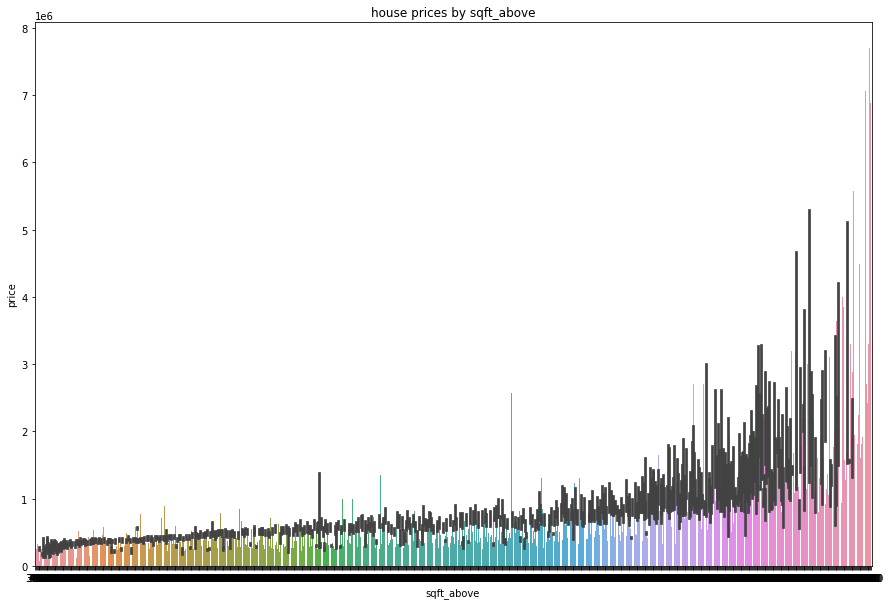

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_above")
plt.xlabel('sqft_above')
plt.ylabel('house prices')
sns.barplot(x='sqft_above',y='price',data=df)

According to this graph, houses with more space are more valuable

## Plotting a graph showing prices of houses with different numbers of bathrooms

<AxesSubplot:title={'center':'house prices by number of bathrooms'}, xlabel='bathrooms', ylabel='price'>

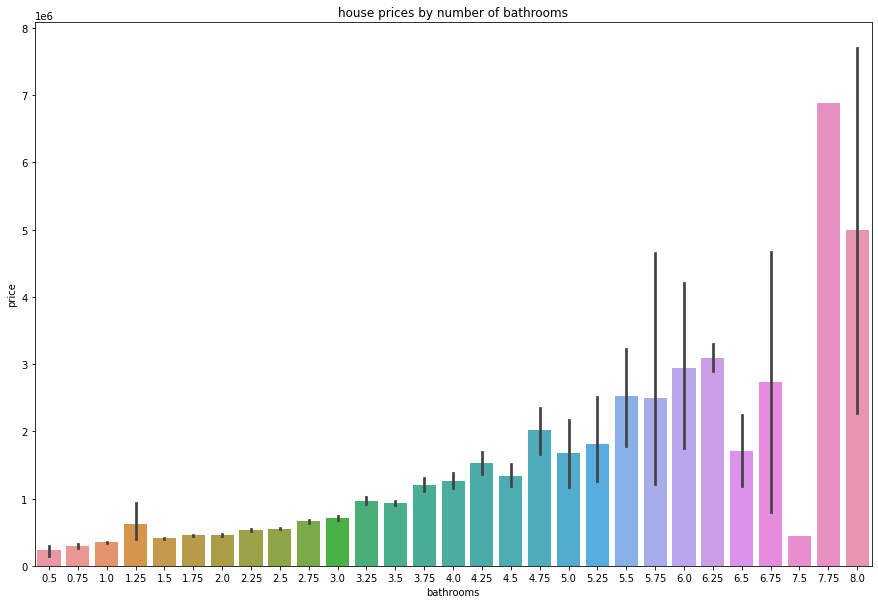

In [19]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by number of bathrooms")
plt.xlabel('bathrooms')
plt.ylabel('house prices')
sns.barplot(x='bathrooms',y='price',data=df)

## Plotting a graph showing prices of houses with grade (construction and design)

<AxesSubplot:title={'center':'house prices by grade'}, xlabel='grade', ylabel='price'>

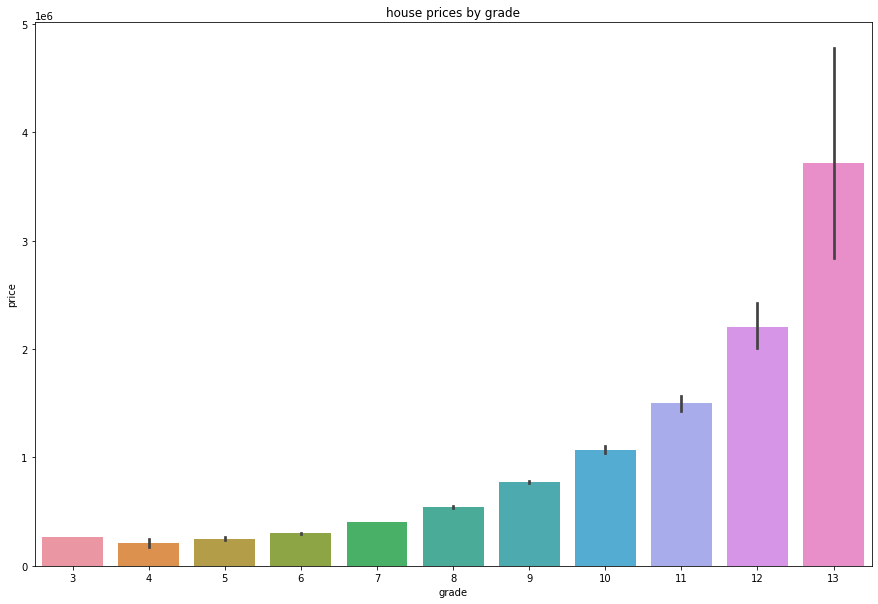

In [20]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by grade")
plt.xlabel('grade')
plt.ylabel('house prices')
sns.barplot(x='grade',y='price',data=df)

## Plotting a graph showing prices of houses with sizes of neighboring houses


<AxesSubplot:title={'center':'house prices by sqft_living15'}, xlabel='sqft_living15', ylabel='price'>

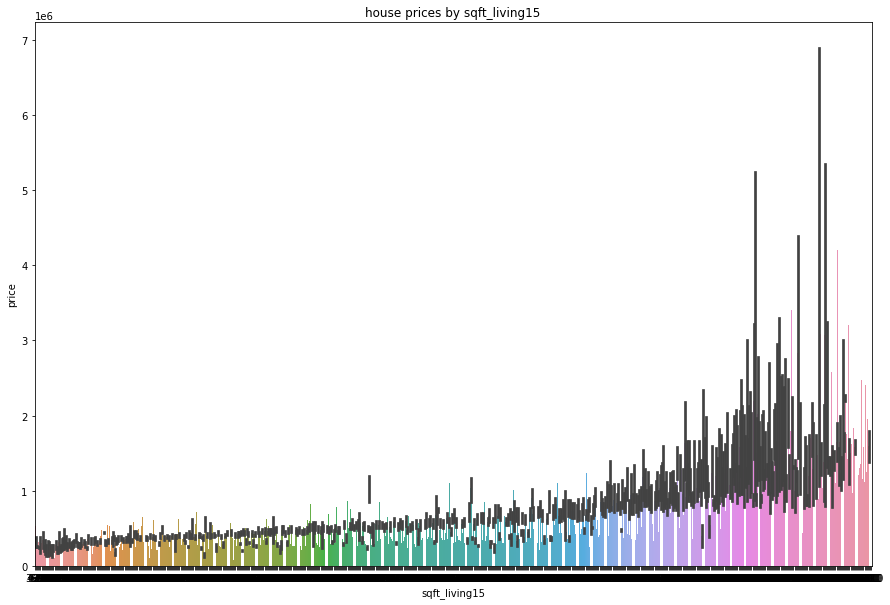

In [21]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house prices by sqft_living15")
plt.xlabel('bathrooms')
plt.ylabel('house prices')
sns.barplot(x='sqft_living15',y='price',data=df)

# 4. Modeling

In this section we will perform both simple and multiple regression and see which model is best by comparing r-squared. We will use sqft_living and price variables to perform the simple regression.

### Check for distribution in the variables

#### Check distribution for the dependent variable

<AxesSubplot:>

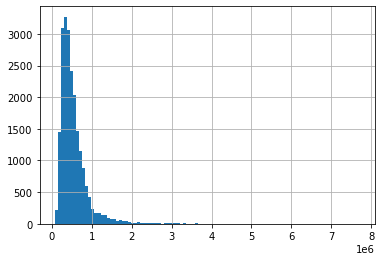

In [22]:
#Check for price distribution
df['price'].hist(bins=100)

The curve is skewed. We want to make it a standard normal curve. We will use lognormal transformation

#### Check distribution for the independent variables

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

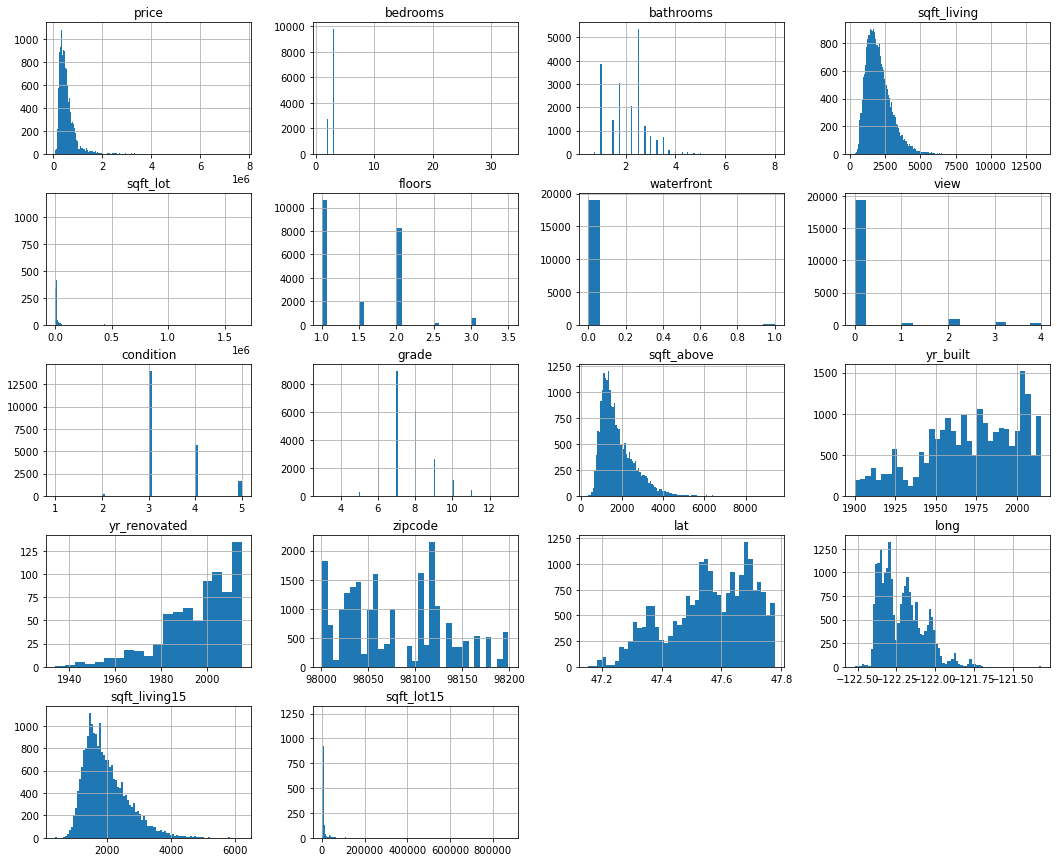

In [23]:
df.hist(figsize=(18,15), bins='auto')

## Transforming the dependent variable (price)

In [24]:
df['log_price']=np.log(df['price'])

In [25]:
# Drop the price column 
df = df.drop('price',axis=1)

In [26]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,10/13/2014,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,NaN,98178,47.5112,-122.257,1340,5650,12.309982
1,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,13.195614
2,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,12.100712
3,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,NaN,98136,47.5208,-122.393,1360,5000,13.311329
4,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,NaN,98074,47.6168,-122.045,1800,7503,13.142166


<AxesSubplot:>

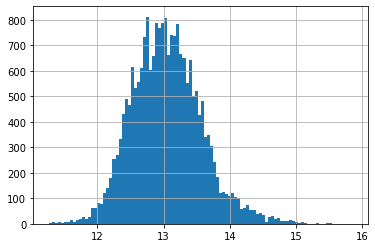

In [27]:
# Check for the distribution of the new log_price column
df['log_price'].hist(bins=100)

#### Correlation of Variable to one another

<AxesSubplot:>

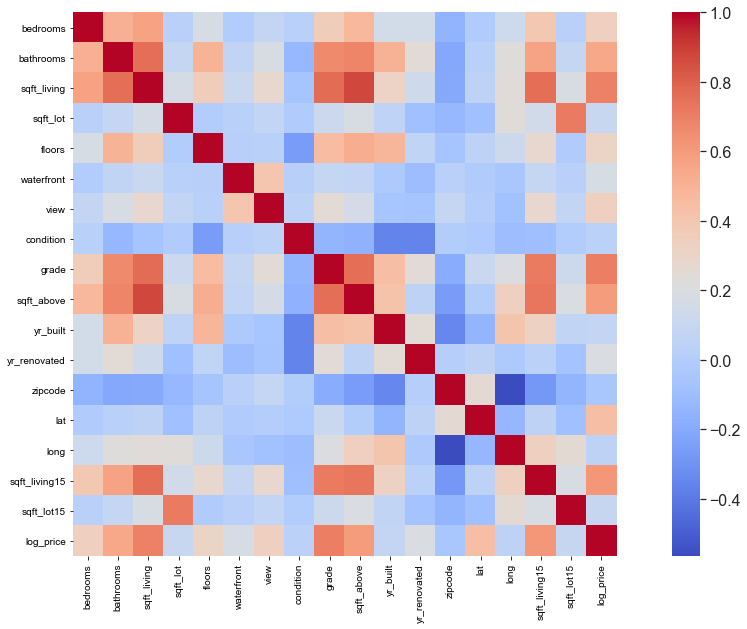

In [28]:
# Plot the correlation results and view level of variable correlation to one another
corplot = df.corr()
plt.subplots(figsize=(20,10))
sns.set(font_scale=1.45)
sns.heatmap(corplot,square=True,cmap='coolwarm')




Find out which independent variables are most correlated with the new dependent variable (log_price)

In [29]:
correlation=corplot['log_price'].sort_values(ascending=False)
features=correlation.index[:10]
features

Index(['log_price', 'grade', 'sqft_living', 'sqft_living15', 'sqft_above',
       'bathrooms', 'lat', 'view', 'bedrooms', 'floors'],
      dtype='object')

# Linearity test on variables most correlated to price

<AxesSubplot:xlabel='sqft_living', ylabel='log_price'>

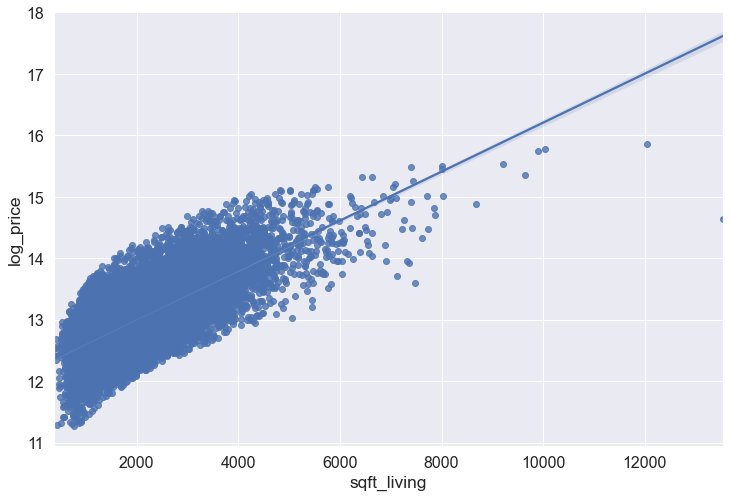

In [30]:
# Plot the variables to establish presence of linearity 
plt.figure(figsize=(12,8))
sns.regplot(x='sqft_living',y='log_price',data=df)

<AxesSubplot:xlabel='grade', ylabel='log_price'>

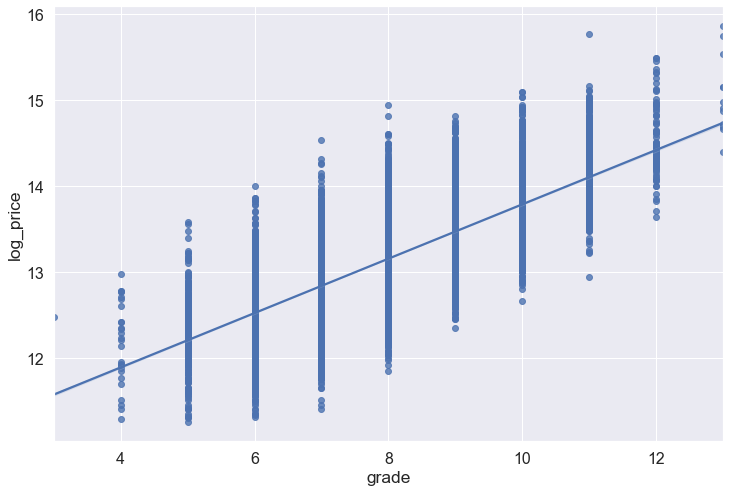

In [31]:
plt.figure(figsize=(12,8))
sns.regplot(x='grade',y='log_price',data=df)

<AxesSubplot:xlabel='sqft_above', ylabel='log_price'>

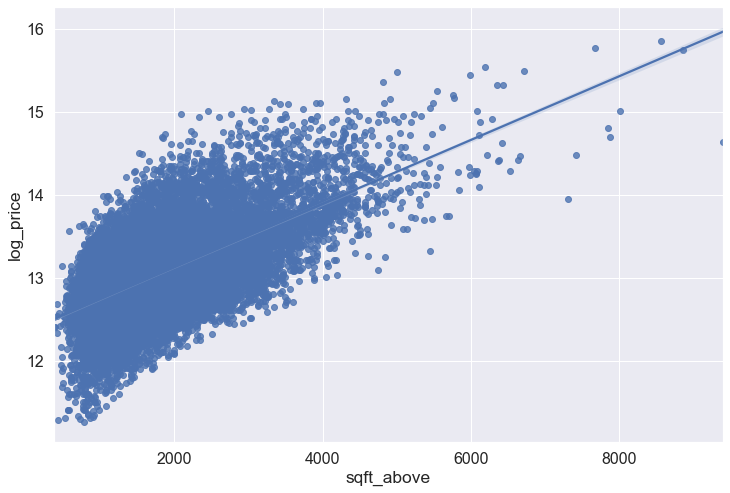

In [32]:
plt.figure(figsize=(12,8))
sns.regplot(x='sqft_above',y='log_price',data=df)

<AxesSubplot:xlabel='sqft_living15', ylabel='log_price'>

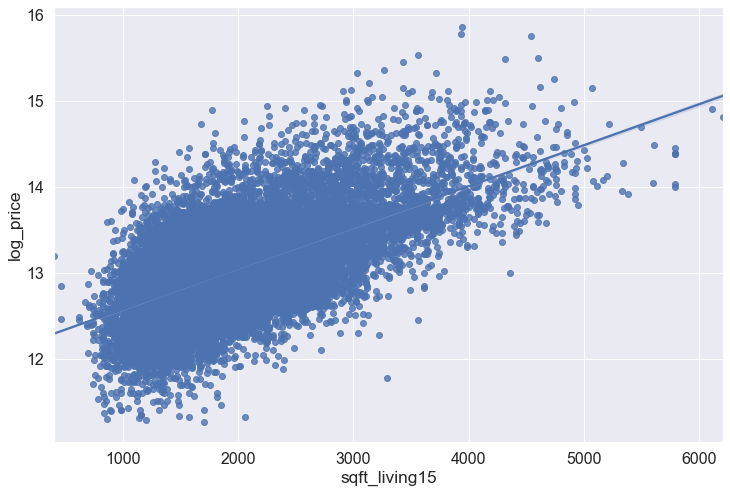

In [33]:
plt.figure(figsize=(12,8))
sns.regplot(x='sqft_living15',y='log_price',data=df)

<AxesSubplot:xlabel='bathrooms', ylabel='log_price'>

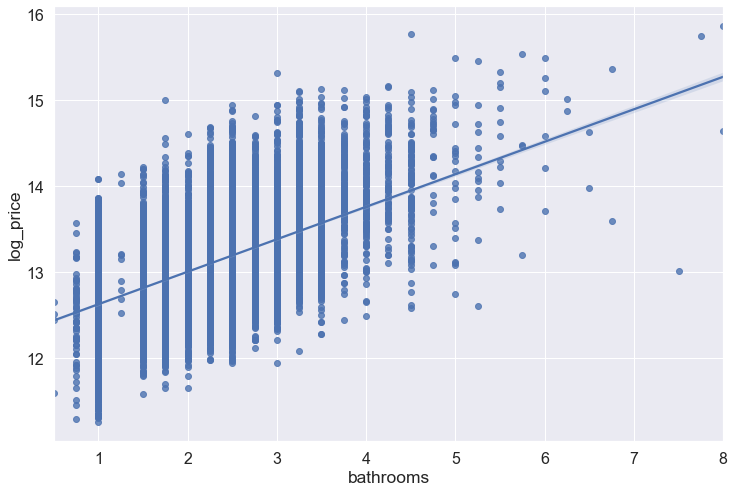

In [34]:
plt.figure(figsize=(12,8))
sns.regplot(x='bathrooms',y='log_price',data=df)

The linear relationship exists.

# Dealing with categorical data

From the graphs above, we can observe that the variables with categorical data are; grade and bathrooms

In [35]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [36]:
df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

### Label encoding

In [37]:
bathrooms = ['1' , '2.25', '3' ,'2' , '4.5' , '1.5' , '2.5' , '1.75', '2.75', '3.25', '4' ,
       '3.5' , '0.75', '4.75', '5' ,'4.25', '3.75', '1.25', '5.25', '6' , '0.5' , '5.5' ,
       '6.75', '5.75', '8' , '7.5' , '7.75', '6.25', '6.5']
bathroom_series = pd.Series(bathrooms)

In [38]:
cat_bathrooms = bathroom_series.astype('category')
cat_bathrooms

0        1
1     2.25
2        3
3        2
4      4.5
5      1.5
6      2.5
7     1.75
8     2.75
9     3.25
10       4
11     3.5
12    0.75
13    4.75
14       5
15    4.25
16    3.75
17    1.25
18    5.25
19       6
20     0.5
21     5.5
22    6.75
23    5.75
24       8
25     7.5
26    7.75
27    6.25
28     6.5
dtype: category
Categories (29, object): ['0.5', '0.75', '1', '1.25', ..., '6.75', '7.5', '7.75', '8']

In [39]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

bathroom_encoded = lb_make.fit_transform(cat_bathrooms)

In [40]:
bathroom_encoded

array([ 2,  7, 10,  6, 16,  4,  8,  5,  9, 11, 14, 12,  1, 17, 18, 15, 13,
        3, 19, 22,  0, 20, 25, 21, 28, 26, 27, 23, 24])

In [41]:
grades = [ '7',  '6',  '8', '11',  '9',  '5', '10', '12',  '4',  '3', '13']
grades_series = pd.Series(grades)

In [42]:
cat_grades = grades_series.astype('category')
cat_grades

0      7
1      6
2      8
3     11
4      9
5      5
6     10
7     12
8      4
9      3
10    13
dtype: category
Categories (11, object): ['10', '11', '12', '13', ..., '6', '7', '8', '9']

In [43]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

grade_encoded = lb_make.fit_transform(cat_grades)

In [44]:
grade_encoded

array([ 8,  7,  9,  1, 10,  6,  0,  2,  5,  4,  3])

With many variables, we want to focus on variables with large correlation numbers to price, we assume a correlation of 0.75 and above should be used.

In [45]:
df.head(5)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,10/13/2014,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,NaN,98178,47.5112,-122.257,1340,5650,12.309982
1,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,13.195614
2,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,12.100712
3,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,NaN,98136,47.5208,-122.393,1360,5000,13.311329
4,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,NaN,98074,47.6168,-122.045,1800,7503,13.142166


In [46]:
df_pred = df.iloc[:,0:20]
df_pred.head(5)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,10/13/2014,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,NaN,98178,47.5112,-122.257,1340,5650,12.309982
1,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,13.195614
2,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,12.100712
3,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,NaN,98136,47.5208,-122.393,1360,5000,13.311329
4,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,NaN,98074,47.6168,-122.045,1800,7503,13.142166


In [47]:
df_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.156142,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.343360
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.253306,-0.204786,0.024280,0.224903,0.569884,0.088303,0.551249
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.132791,-0.199802,0.052155,0.241214,0.756402,0.184342,0.695185
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,-0.082031,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.100025
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.059870,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.310630
waterfront,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,-0.101376,0.031057,-0.012772,-0.039864,0.088860,0.032002,0.180524
view,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,-0.059170,0.085277,0.006141,-0.077894,0.279561,0.073332,0.345466
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.362244,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.038918
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,0.249727,-0.146896,1.000000,0.756073,0.447865,0.242323,-0.185771,0.113575,0.200341,0.713867,0.120981,0.703720
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.075463,0.166299,-0.158904,0.756073,1.000000,0.424037,0.052690,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.601579


In [48]:
abs(df_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False


# Fitting the multiple regression on non transformed data

In [49]:
df.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

In [50]:
formula = 'log_price ~ sqft_above+sqft_living+grade+sqft_living15+bathrooms'
model1 = ols(formula=formula, data=df).fit()

In [ ]:
model1 = ols(formula=formula, data=df).fit()
model1.summary()

# Normality Check 

In [51]:
# Using the jarque-bera method
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model1.resid)
list(zip(name, test))

[('Jarque-Bera', 23.800784024977602),
 ('Prob', 6.787743405576422e-06),
 ('Skew', 0.07497318360272798),
 ('Kurtosis', 2.9370311504321625)]

We have a JB value = 23.800784024977602, which is high and does not favor normality, and the p-value of 6.79 is high and thus we fail to reject the null hypothesis for normality. Additionally, the kurtosis is below 3, where a kurtosis higher than 3 indicates heavier tails than a normal distribution. The skewness values however show that underlying data is not very skewed.

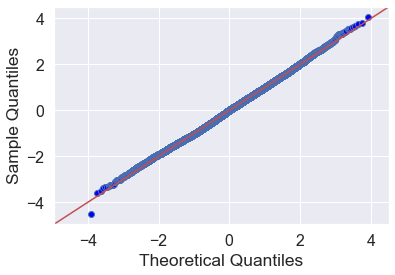

In [52]:
# Using the qq-plot method
resid1 = model1.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

From this qqplot, we can see that the normality theory is true

# Check for heteroskedasticity

Text(0.5, 0.99, 'Residuals Scatterplot')

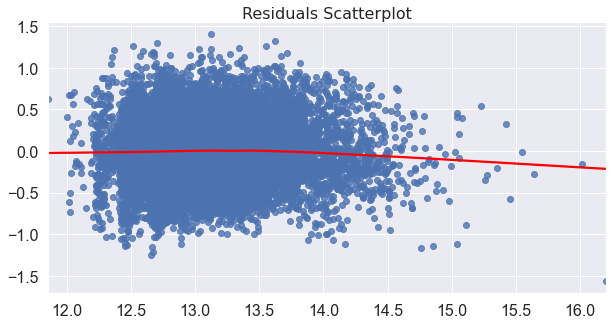

In [56]:
plt.figure(figsize=(10,5))
sns.regplot(x=model1.predict(), y=model1.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99, fontname='Silom')

We can see that the points have a roughly symmetrical blob-like shape that is consistent across the x-axis. The model satisfies the assumption of homoscedasticity.

#### Save the most correlated variables in a dataframe

In [57]:
df.head(5)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,10/13/2014,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,NaN,98178,47.5112,-122.257,1340,5650,12.309982
1,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,13.195614
2,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,12.100712
3,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,NaN,98136,47.5208,-122.393,1360,5000,13.311329
4,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,NaN,98074,47.6168,-122.045,1800,7503,13.142166


In [58]:
s = corplot.unstack()
so = s.where((s >= 0.75) & (s < 1)).dropna().sort_values(kind="quicksort", ascending=False)
print(so)

sqft_above     sqft_living      0.876448
sqft_living    sqft_above       0.876448
grade          sqft_living      0.762779
sqft_living    grade            0.762779
sqft_living15  sqft_living      0.756402
sqft_living    sqft_living15    0.756402
sqft_above     grade            0.756073
grade          sqft_above       0.756073
sqft_living    bathrooms        0.755758
bathrooms      sqft_living      0.755758
dtype: float64


In [59]:
df.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

# Transformation of non-normal features

In [60]:
df['log_sqft_above']=np.log(df['sqft_above'])
df['log_sqft_living']=np.log(df['sqft_living'])
#df['log_grade']=np.log(df['grade'])
df['log_sqft_living15']=np.log(df['sqft_living15'])
#df['log_bathrooms']=np.log(df['bathrooms'])

#### Removing non-correlated features

In [61]:
df.head(5)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,log_sqft_above,log_sqft_living,log_sqft_living15
0,10/13/2014,3,1.00,1180,5650,1.0,NaN,0.0,3,7,...,NaN,98178,47.5112,-122.257,1340,5650,12.309982,7.073270,7.073270,7.200425
1,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,1991.0,98125,47.7210,-122.319,1690,7639,13.195614,7.682482,7.851661,7.432484
2,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,NaN,98028,47.7379,-122.233,2720,8062,12.100712,6.646391,6.646391,7.908387
3,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,NaN,98136,47.5208,-122.393,1360,5000,13.311329,6.956545,7.580700,7.215240
4,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,NaN,98074,47.6168,-122.045,1800,7503,13.142166,7.426549,7.426549,7.495542


In [62]:
# corr values are very low that's why I removed them to use data efficently

df.drop(['date', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'], axis = 1, inplace = True)


In [63]:
df.head(5)

,bathrooms,grade,log_price,log_sqft_above,log_sqft_living,log_sqft_living15
0,1.00,7,12.309982,7.073270,7.073270,7.200425
1,2.25,7,13.195614,7.682482,7.851661,7.432484
2,1.00,6,12.100712,6.646391,6.646391,7.908387
3,3.00,7,13.311329,6.956545,7.580700,7.215240
4,2.00,8,13.142166,7.426549,7.426549,7.495542


# Checking for variable distribution after transformation

array([[<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'log_price'}>,
        <AxesSubplot:title={'center':'log_sqft_above'}>],
       [<AxesSubplot:title={'center':'log_sqft_living'}>,
        <AxesSubplot:title={'center':'log_sqft_living15'}>]], dtype=object)

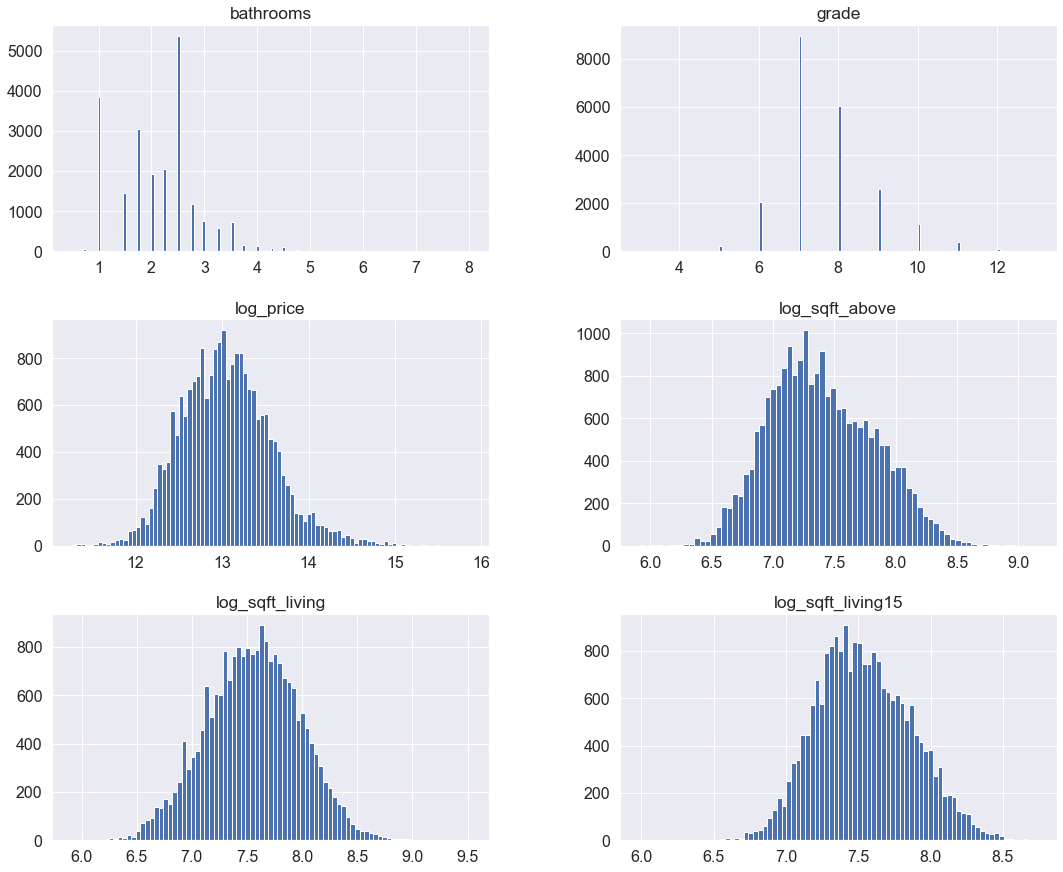

In [64]:
df.hist(figsize=(18,15), bins='auto')

# Fitting a multiple linear regression

In [66]:
formula = 'log_price ~ log_sqft_above+log_sqft_living+grade+log_sqft_living15+bathrooms'
model2 = ols(formula=formula, data=df).fit()

In [67]:
outcome = 'log_price'
predictors = df.drop('log_price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [68]:
model2 = ols(formula=formula, data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     5518.
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:34:02   Log-Likelihood:                -7902.6
No. Observations:               21597   AIC:                         1.582e+04
Df Residuals:                   21591   BIC:                         1.587e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.8975      0.074    106.410      0.000       7.752       8.043
bathrooms            -0.0028      0.005     -0.575      0.565      -0.012       0.007
grade                 0.2072      0.003     61.639      0.000       0.201       0.214
log_sqft_above       -0.2552      0.012    -21.788      0.000      -0.278      -0.232
log_sqft_living       0.5224      0.013     39.252      0.000       0.496       0.549
log_sqft_living15     0.2006      0.012     17.367      0.000       0.178       0.223
==============================================================================
Omnibus:                       69.306   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.823
Skew:                           0.137   Prob(JB):                     6.89e-16
Kurtosis:                       2.948   Cond. No.                         481.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Normality test

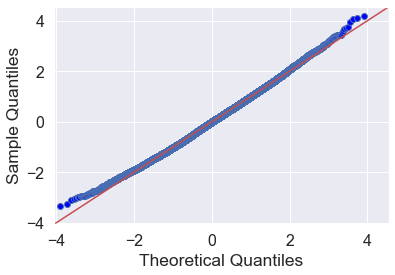

In [69]:
# Using the qq-plot method
resid2 = model2.resid
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

The model passes the normality check

# Heteroskedasticity check

Text(0.5, 0.99, 'Residuals Scatterplot')

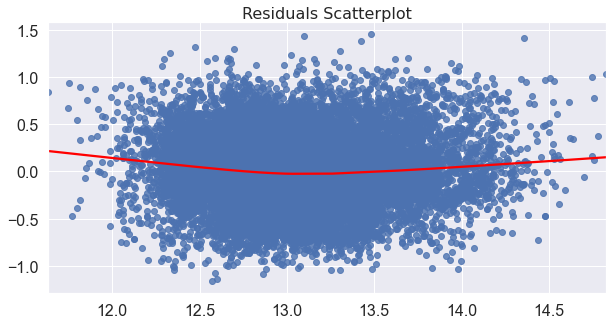

In [70]:
plt.figure(figsize=(10,5))
sns.regplot(x=model2.predict(), y=model2.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99, fontname='Silom')

We can see that the points have a roughly symmetrical blob-like shape that is consistent across the x-axis. The model satisfies the assumption of homoscedasticity.

# Fitting a simple regression model using most correlated variable

In [71]:
formula = 'log_price ~ log_sqft_living15'
model0 = ols(formula=formula, data=df).fit()

In [72]:
model0 = ols(formula=formula, data=df).fit()
model0.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                 1.261e+04
Date:                Thu, 07 Jul 2022   Prob (F-statistic):               0.00
Time:                        12:35:28   Log-Likelihood:                -11826.
No. Observations:               21597   AIC:                         2.366e+04
Df Residuals:                   21595   BIC:                         2.367e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.6876      0.066     86.683      0.000       5.559       5.816
log_sqft_living15     0.9763      0.009    112.289      0.000       0.959       0.993
==============================================================================
Omnibus:                      407.138   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.501
Skew:                           0.288   Prob(JB):                    9.19e-104
Kurtosis:                       3.442   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Normality test

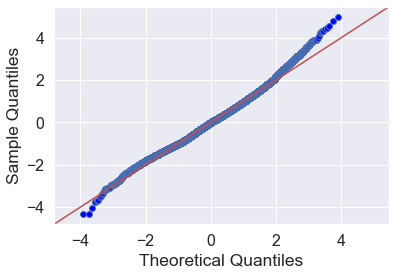

In [73]:
# Using the qq-plot method
resid0 = model0.resid
fig = sm.graphics.qqplot(resid0, dist=stats.norm, line='45', fit=True)

# Heteroskedasticity test

Text(0.5, 0.99, 'Residuals Scatterplot')

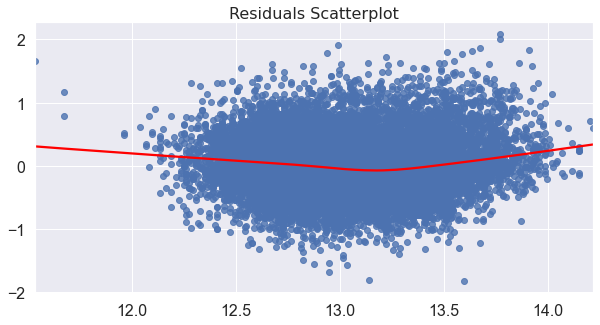

In [74]:
plt.figure(figsize=(10,5))
sns.regplot(x=model0.predict(), y=model0.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99, fontname='Silom')

We can see that the points have a roughly symmetrical blob-like shape that is consistent across the x-axis. The model satisfies the assumption of homoscedasticity.